In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.integrate import trapz
from scipy.stats import linregress
import seaborn as sns
%matplotlib inline

1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


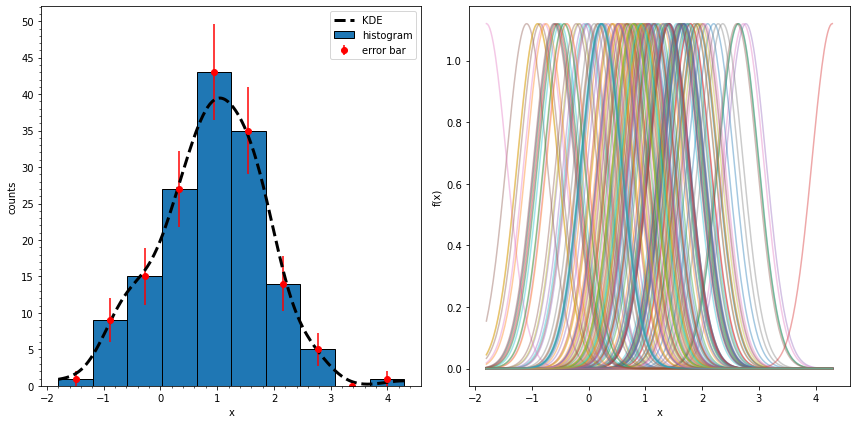

In [2]:
# numpy array,len(N) (N=O(100)), normally distributed, with a given mean a std
mean = 1
std = 1
N = 150
x = np.random.normal(loc=mean, scale=std, size=N)

# Fill an histogram in pyplot taking properly care about the aesthetic
'''
use a meaningful number of bins
set a proper y axis label
set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
display the histograms as data points with errors (the error being the poisson uncertainty)
''' 
#number of bins: 2 * N**(1/3)
bins_num = int(2 * N**(1/3))

# the hist
hist, bin_edges = np.histogram(x, bins=bins_num)

#error
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
poisson_err = np.sqrt(hist)

# for every element of x, create a gaussian
means = x
std = 1.06 * x.std() * x.size**(-1/5)

t = np.linspace(x.min(), x.max(), 300)
gaussians = norm.pdf(t[:, np.newaxis], loc=means, scale=std).T

# sum all gaussians and normalize it and fit it to hist
tot_gauss = np.sum(gaussians, axis=0)
tot_gauss_int = trapz(tot_gauss, t) # area under the tot gause
x_int = trapz(hist, bin_centers) # area under the hist
tot_gauss = (tot_gauss / tot_gauss_int) * x_int

# plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(x, bins=bin_edges, label='histogram', edgecolor = "black")
plt.errorbar(bin_centers, hist, yerr=poisson_err, fmt='o', color='red', label='error bar')
plt.plot(t, tot_gauss, linestyle='dashed', color='black', linewidth=3, label='KDE')

plt.xlabel('x')
plt.ylabel('counts')
plt.yticks(np.arange(0, (np.max(hist) + np.max(poisson_err)) + 3, 5))
plt.minorticks_on() # Enable minor ticks on the Y-axis
plt.legend()


# In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
plt.subplot(1, 2, 2)
for gaussian in gaussians:
    plt.plot(t, gaussian, alpha=0.4)
plt.xlabel('x')
plt.ylabel('f(x)')

plt.tight_layout()
plt.show()

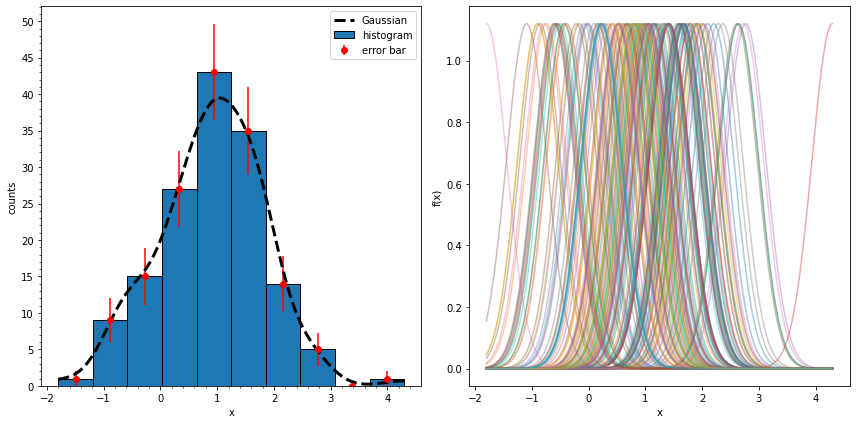

In [3]:
# Create subplots
fig, (ax_1, ax_2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot on the first axis (ax_1)
ax_1.hist(x, bins=bin_edges, label='histogram', edgecolor='black')
ax_1.errorbar(bin_centers, hist, yerr=poisson_err, fmt='o', color='red', label='error bar')
ax_1.plot(t, tot_gauss, linestyle='dashed', color='black', linewidth=3, label='Gaussian')
ax_1.set_xlabel('x')
ax_1.set_ylabel('counts')
ax_1.set_yticks(np.arange(0, (np.max(hist) + np.max(poisson_err)) + 3, 5))
# Enable minor ticks on the Y-axis
ax_1.minorticks_on()
ax_1.legend()

# Plot on the second axis (ax_2)
for gaussian in gaussians:
    ax_2.plot(t, gaussian, alpha=0.4)
ax_2.set_xlabel('x')
ax_2.set_ylabel('f(x)')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

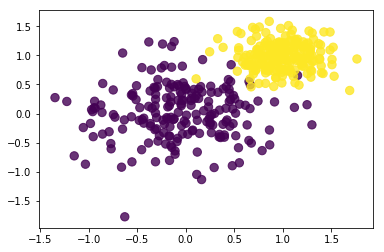

In [4]:
#! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

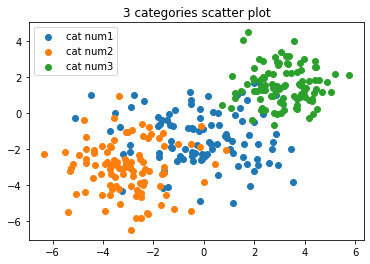

In [5]:
# Write a function that generate a 2D datasets of 2 or more categories.
# each category should distribute as a 2D gaussian with a given mean and std
def gaussian_gen(n, size):
    '''
    n = number of categories
    size = size of each category
    '''
    # generate random values for mean
    #means = np.random.uniform(low=-3, high=3, size=(2, n))
    means = np.random.choice([-3, -1.5, 0, 1.5, 3], size=(2, n), replace=True)
    
    # generate random values for 
    stds = np.random.uniform(low=0.5, high=2, size=(2, n))
    
    data = np.zeros((n, 2, size))
    for i in range(n):
        x = np.random.normal(loc=means[0, i], scale=stds[0, i], size=size)
        y = np.random.normal(loc=means[1, i], scale=stds[0, i], size=size)
        data[i] += np.stack((x, y), axis=0)
    return data

# number of categories n >= 2 and their size
n = 3
size = 100

# generating data
data = gaussian_gen(n, size);

# plot
plt.title(str(n)+' categories scatter plot')
for _ in range(n):
    plt.scatter(data[_, 0], data[_, 1], label='cat num' + str(_+1))
plt.legend()
plt.show()

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [6]:
df = pd.DataFrame(np.load('residuals_261.npy', allow_pickle=True).item())

In [7]:
# Inspect the dataset, you'll find two variables (features)
df

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
2,-7.200000,3.4
3,-4.150000,8.4
4,-6.590000,1.7
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


In [8]:
# Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
df_clean = df.loc[np.abs(df['residuals']) < 2].copy()
df_clean

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
8,-0.042857,3.3
9,0.128571,5.3
10,0.085714,15.0
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


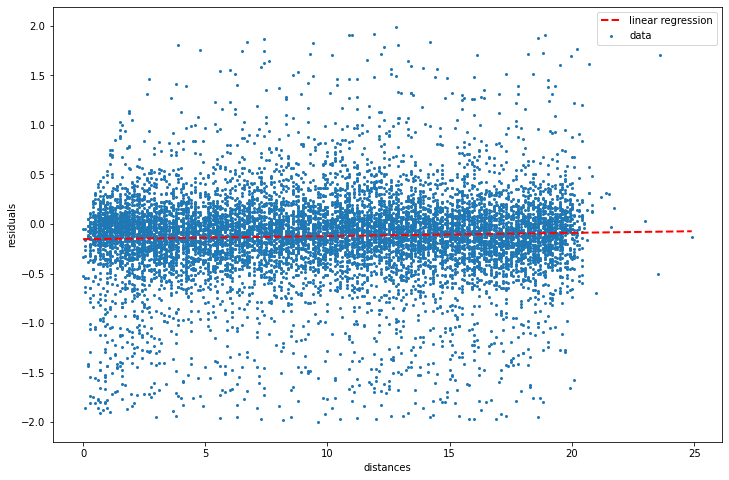

In [9]:
# perform a linear regression of "residuals" versus "distances" using scipy.stats.linregress()
linregress_result = linregress(x=df_clean.distances, y=df_clean.residuals)
slope, intercept = linregress_result[0: 2]

# plot the data
plt.figure(figsize=(12, 8))
plt.scatter(x=df_clean.distances, y=df_clean.residuals, s=4, label='data')

# plot the regression line
x_line = np.linspace(start=df_clean.distances.min(), stop=df_clean.distances.max(), num=100)
y_line = slope * x_line + intercept
plt.plot(x_line, y_line, label='linear regression', color='red', linestyle='dashed', linewidth=2)
plt.xlabel('distances')
plt.ylabel('residuals')

plt.legend()
plt.show()

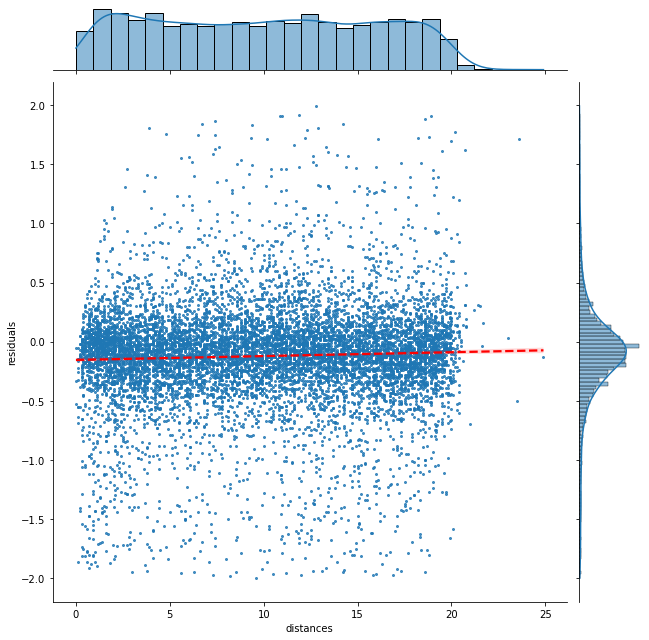

In [10]:
'''
plot a seaborn jointplot of "residuals" versus "distances",
having seaborn performing a linear regression.
The result of the regression should be displayed on the plot
'''
# Create a scatter plot with regression line using jointplot
# Use kind='reg' for regression line
# scatter_kws={'s': 10} controls the size of the scatter points
# line_kws={'color': 'red'} controls the color of the regression line
sns.jointplot(x='distances', y='residuals', data=df_clean, kind='reg', height=9, ratio=7,
              scatter_kws={'s': 4}, line_kws={'color': 'red', 'linestyle': 'dashed'})

# Display the plot
plt.show()

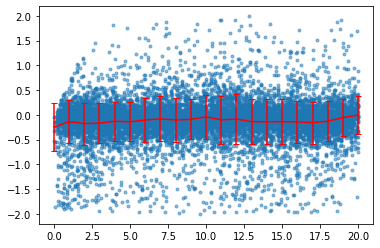

In [25]:
'''
Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable.
    It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals",
    estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals",
    estimated in slices (bins) of "distance"
Plot the profile plot on top of the scatter plot
'''
# delet data with distances mor than 25
df_clean  = df_clean.loc[df_clean['distances'] <= 20.0]

x = np.linspace(0, 20, 21)

y = np.zeros_like(x)
erry = np.zeros_like(x)
for i in x:
    y[int(i)] = np.mean(df_clean.loc[(df_clean['distances'] >= i) & (df_clean['distances'] < i+1)]['residuals'])
    erry[int(i)] = np.std(df_clean.loc[(df_clean['distances'] >= i) & (df_clean['distances'] < i+1)]['residuals'])

plt.errorbar(x, y, erry, color='r', capsize=3, fmt='-')
plt.scatter(df_clean['distances'], df_clean['residuals'], marker='.', alpha=0.5)
plt.show()